# Decision Trees

Consider a dataset $D := \{(x_i, y_i)\}_{i=1}^{N} \subset (X \times Y)^{N}$

Partition the feature space $X$ into regions $R_1, ..., R_J$

For each $R_j$ aggregate a constant prediction model

$$
\large \text{$\hat{y}^{R_j} = aggregate(\pi_y(\{(x, y) \in D | x \in R_j\}))$}
$$

Mathematically, a decision tree/regression tree $f(x)$ is specified by

$$
\large \text{$ \langle R_1, ..., R_J, \hat{y}^{R_1}, ..., \hat{y}^{R_J} \rangle$}
$$

### Tree Prediction

The prediction of a decision/regression tree with parameters  

$\theta = \langle R_1, \ldots, R_J, \hat{y}(R_1), \ldots, \hat{y}(R_J) \rangle$ is  

$$
f(x; \theta) = \sum_{j=1}^{J} \hat{y}(R_j) \cdot \mathbb{1}(x \in R_j)
$$

Here, $\mathbb{1}(\cdot)$ is the indicator function:  

$$
\mathbb{1}(a) := 
\begin{cases} 
1 & \text{if } a = \top \\
0 & \text{otherwise} 
\end{cases}
$$


In [260]:
import numpy as np
import matplotlib.pyplot as plt

In [261]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [262]:
iris = load_iris()
X, y = iris.data[:, :2], iris.target
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (150, 2)
Shape of y: (150,)


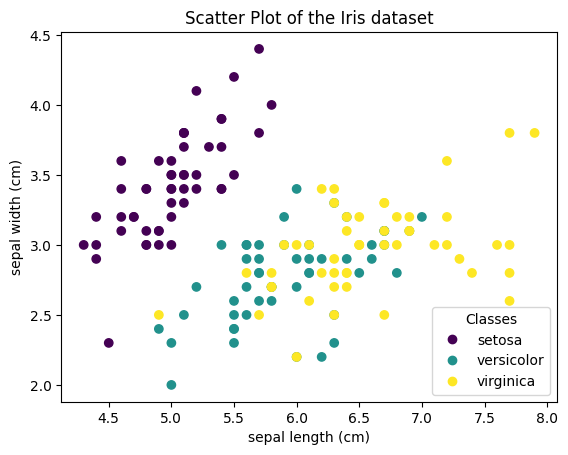

In [263]:
_, ax  = plt.subplots()
ax.set_title('Scatter Plot of the Iris dataset')
scatter = ax.scatter(X[:,0], X[0:, 1], c=y)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax.legend(scatter.legend_elements()[0], iris.target_names, loc='lower right', title='Classes')
plt.show()

In [264]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

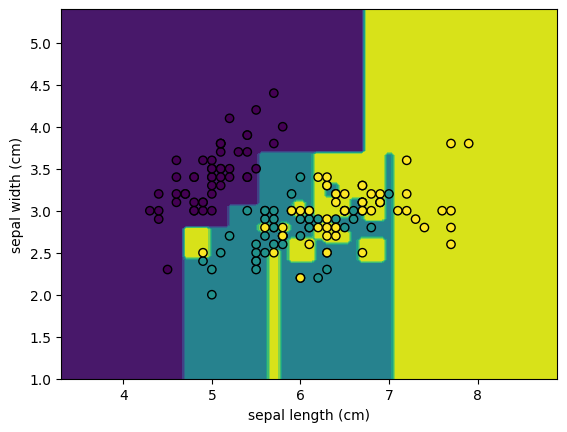

In [265]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method='predict',
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor='k')
plt.show()

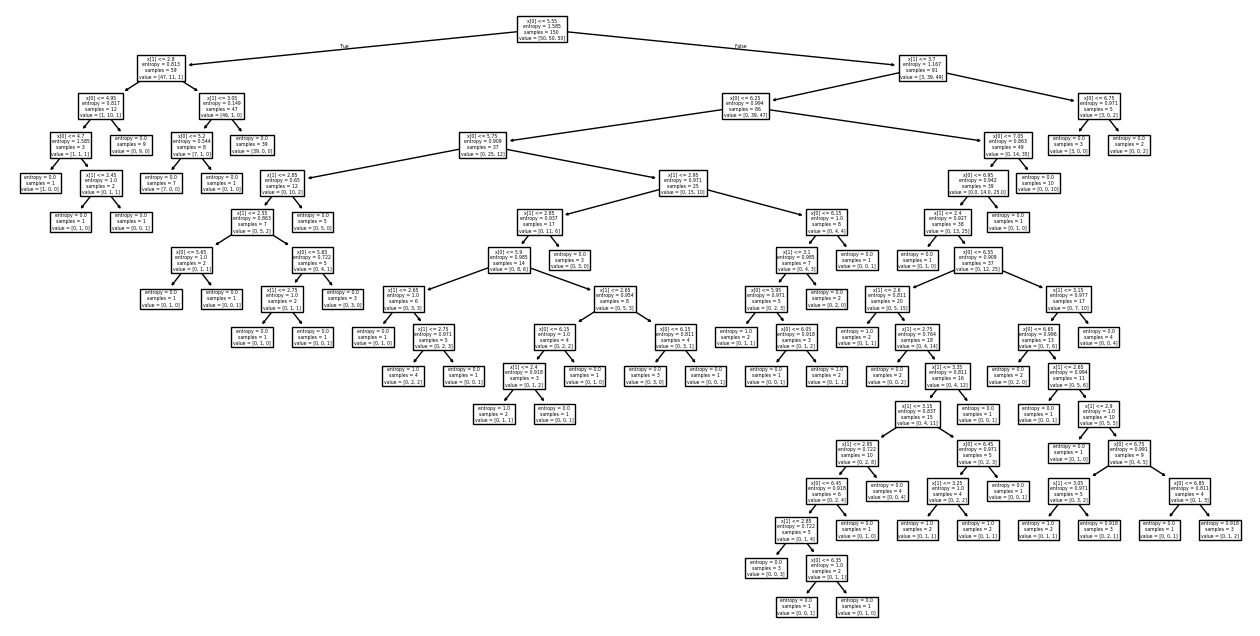

In [266]:
plt.figure(figsize=(16, 8))
tree.plot_tree(clf)
plt.show()